#Линейные модели

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Логистическая регрессия

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.


Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. 

### Рабочая часть модели

В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$z(x_{i})=\left \langle w,x_{i} \right \rangle$$

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$


### Потери

В случае, когда $y$ принимает значения 0 и 1, log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} \frac{exp(-\left \langle w,x_{i} \right \rangle)}{1 + exp(-\left \langle w,x_{i} \right \rangle)}).$$



$$-\text{ln}L(X) = -\sum^{l}_{i=1} ( y_{i} \text{ln}\ sigma(z_{i}) + (1 - y_{i})\text{ln} ( 1  -  sigma(z_{i}))).$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings( "ignore")

Реализация логистической регрессии :

In [4]:
#
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#
def log_loss(w, X, y):
    m = X.shape[1]
    

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

#
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    X = X.T
    X = np.vstack((np.ones((1,X.shape[1])),X))
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append({'LogLosses': loss})
        
    return w, losses
#
def predict(w, X):
    X = X.T
    m = X.shape[1]
    X = np.vstack((np.ones((1,X.shape[1])),X))
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

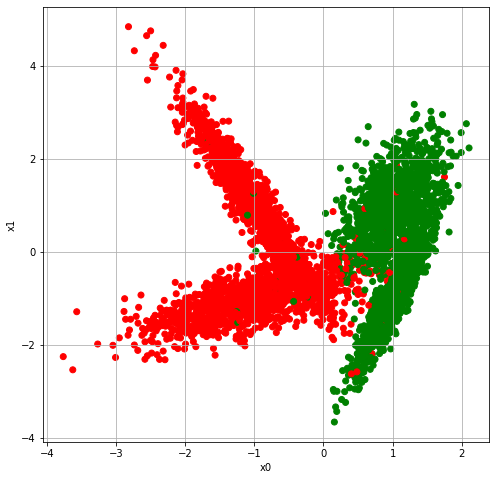

In [6]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=110)
# 

#classes = datasets.make_blobs(n_samples=1000,centers = 2, cluster_std = 1., random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


### **Задание 1.**

1.1 Измените модель логистической регрессии из кода выше на модель с условием выхода по числу итераций (это есть ) и разнице параметров w для двух последовательных шагов.

1.2 Измените модель для сохранения на каждом шаге изменения параметров w ошибки модели в тестовом наборе данных (на отложенной выборке)

1.3 Добавьте собственную реализацию вычисления Accuracy

1.4 Оцените (постройте кривые изменения Accuracy и потерь для тестовой(отложенной выборки) ) поведение модели при использовании одного критерия останова и 2-х (исходная схема модели и модель по п.1.1) 

1.5  зафиксируйте результаты в таблице и сделайте выводы

In [7]:
# Задание 1


# разбиение данных на тренировочные и отложенную выборку (тестовые), 
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.2 - пропорция разбиения (доля тестов)
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(classes[0], classes[1], test_size=0.2, random_state=1)

# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[1]+1, 1))+0.1
n_iterations = 500
eta = 0.005
eps = 0.0001
w = w0

acc = []
# количество итерация 
for i in range(n_iterations):
  w0 = w
  w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

  if np.linalg.norm(w0 - w) <= eps:
        break

  y_predicted_test = predict(w, X_test_tr)
  y_predicted_train = predict(w, X_train_tr)

  accuracy_train = (y_predicted_train == y_train_tr).sum() / len(y_train_tr)
  # accuracy_score_train = accuracy_score(y_predicted_train, y_train_tr)
  # acc.append(accuracy_train)

  accuracy_test = (y_predicted_test == y_test_tr).sum() / len(y_test_tr)
  # accuracy_score_test = accuracy_score(y_predicted_test, y_test_tr)
  # # acc.append(accuracy_test)

  acc.append({'Accuracy Train': accuracy_train,
              # 'Accuracy Score Train': accuracy_score_train,
              'Accuracy Test': accuracy_test
              # 'Accuracy Score Test': accuracy_score_test
              })
  

acc_df = pd.DataFrame(acc)
# loss_df = pd.DataFrame(losses)
print(acc_df)
# print(loss_df)

# В качестве меры точности возьмем долю правильных ответов
# train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
# test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

# print(f"Итоговый вектор весов w: {w}")
# print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
# print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

     Accuracy Train  Accuracy Test
0           0.95850          0.965
1           0.96200          0.968
2           0.96400          0.969
3           0.96475          0.970
4           0.96600          0.974
..              ...            ...
486         0.97225          0.981
487         0.97225          0.981
488         0.97225          0.981
489         0.97225          0.981
490         0.97225          0.981

[491 rows x 2 columns]


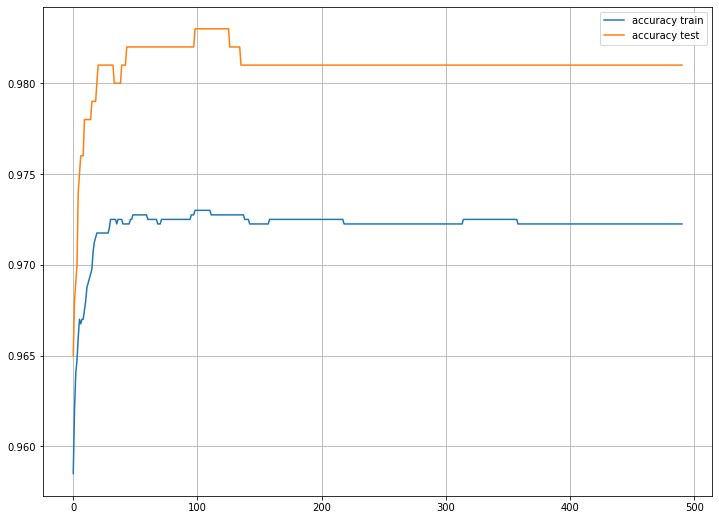

In [8]:
plt.figure(figsize=(12, 9))
plt.plot([i for i in range(491)], acc_df['Accuracy Train'], label='accuracy train')
plt.plot([k for k in range(491)], acc_df['Accuracy Test'], label='accuracy test')
plt.grid()
plt.legend()
plt.show()

### **Задание 2.**

1.1  Проведите эксперимент(для кода из результата задания 1) с изменением шага обучения eta в диапазоне (0.1, 2) с дискретностью 0.1

1.2  зафиксируйте результаты в таблице и сделайте выводы


In [9]:
# Задание 2


# разбиение данных на тренировочные и отложенную выборку (тестовые), 
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.2 - пропорция разбиения (доля тестов)
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(classes[0], classes[1], test_size=0.2, random_state=1)

# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[1]+1, 1))+0.1
n_iterations = 500
# eta = 0.005
eps = 0.0001
w = w0

acc = []
# количество итерация 
# for i in range(n_iterations):
for eta in np.arange(0.1, 2.1, 0.1):
  w0 = w
  w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

  # if np.linalg.norm(w0 - w) <= eps:
  #        break

  y_predicted_test = predict(w, X_test_tr)
  y_predicted_train = predict(w, X_train_tr)

  accuracy_train = (y_predicted_train == y_train_tr).sum() / len(y_train_tr)
    # accuracy_score_train = accuracy_score(y_predicted_train, y_train_tr)
    # acc.append(accuracy_train)

  accuracy_test = (y_predicted_test == y_test_tr).sum() / len(y_test_tr)
    # accuracy_score_test = accuracy_score(y_predicted_test, y_test_tr)
    # # acc.append(accuracy_test)

  acc.append({'Eta': eta,
              'Accuracy Train': accuracy_train,
                # 'Accuracy Score Train': accuracy_score_train,
              'Accuracy Test': accuracy_test
                # 'Accuracy Score Test': accuracy_score_test
              })
    

acc_df = pd.DataFrame(acc)
# loss_df = pd.DataFrame(losses)
print(acc_df)
# print(loss_df)

# В качестве меры точности возьмем долю правильных ответов
# train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
# test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

# print(f"Итоговый вектор весов w: {w}")
# print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
# print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

    Eta  Accuracy Train  Accuracy Test
0   0.1         0.97175          0.981
1   0.2         0.97275          0.982
2   0.3         0.97275          0.983
3   0.4         0.97250          0.981
4   0.5         0.97225          0.981
5   0.6         0.97225          0.981
6   0.7         0.97225          0.981
7   0.8         0.97225          0.981
8   0.9         0.97225          0.981
9   1.0         0.97225          0.981
10  1.1         0.97225          0.981
11  1.2         0.97225          0.981
12  1.3         0.97225          0.981
13  1.4         0.97225          0.981
14  1.5         0.97225          0.981
15  1.6         0.97225          0.981
16  1.7         0.97225          0.981
17  1.8         0.97225          0.981
18  1.9         0.97225          0.981
19  2.0         0.97225          0.981


## Sklearn LogisticRegression

Классификатор логистической регрессии (также известный как логит, MaxEnt) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

  - Класс реализует логистическую регрессию с использованием библиотеки «liblinear», решателей «newton-cg», «sag», «saga» и «lbfgs». 

  - Регуляризация применяется по умолчанию (не для всех решателей одинаковая).

  - В случае с несколькими классами алгоритм обучения использует схему «один против остальных» (OvR)


  - penalty {'l1', 'l2', 'elasticnet', 'none'}, по умолчанию = 'l2':

      - 'none': пенальти не добавляется;

      - 'l2': штраф L2 (по умолчанию);

      - 'l1': штраф L1;

      -  'elasticnet': штраф L1 и L2.

  - tol: критерий останова по изменению параметров модели default=1e-4

  - class_weight - dict или ‘balanced’, default=None. Веса, классов для случая разбалансированных данных (большему классу ставим меньший вес) . Если не указано, предполагается, что все классы имеют вес один.{class_label: weight}
. Режим ‘balanced’использует значения y для автоматической корректировки весов обратно пропорционально частотам классов во входных данных как .n_samples / (n_classes * np.bincount(y))

  - solver : решатель {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, по умолчанию = 'lbfgs'. Алгоритм для использования в задаче оптимизации. Значение по умолчанию — 'lbfgs'. Для небольших наборов данных хорошим выбором является «liblinear», «sag» и «saga» работают быстрее для больших.Для многоклассовых задач только «newton-cg», «sag», «saga» и «lbfgs». Выбор алгоритма и штрафа связаны. Поддерживаемые решателем штрафы:

      - ‘newton-cg’ - [‘l2’, ‘none’]
      - ‘lbfgs’ - [‘l2’, ‘none’]
      - ‘liblinear’ - [‘l1’, ‘l2’]
      - ‘sag’ - [‘l2’, ‘none’]
      - ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]


  - max_iter : критерий останова по числу итераций, по умолчанию = 100
Максимальное количество итераций, необходимых для сходимости решателей.

  - multi_class {‘auto’, ‘ovr’, ‘multinomial’}, по умолчанию = ‘auto’. Если выбрана опция 'ovr', то для каждой метки решается бинарная задача. Для ‘multinomial’ минимизация потерь — это ‘multinomial’ потери, подходящие для всего распределения вероятностей, даже если данные являются двоичными . 
  - n_jobs : Количество ядер ЦП, используемых при распараллеливании по классам, если multi_class='ovr'». None означает 1,  -1 означает использование всех процессоров. 

  - l1_ratio параметр регуляризации Elastic-Net для комбинирования L1 и L2.




In [10]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

## SKlearn метрики

Модуль sklearn.metrics предоставляет набор простых функций, измеряющих ошибку предсказания с учетом истинности и предсказания:

  - функции, заканчивающиеся на, _score возвращают значение для максимизации, чем выше, тем лучше.
  - функции, заканчивающиеся на _error или _loss возвращающие значение, которое нужно минимизировать, чем ниже, тем лучше. 
  

Некоторые из них ограничены случаем двоичной классификации:

  - precision_recall_curve(y_true, probas_pred, *)	Вычислите пары точности-полноты для разных пороговых значений вероятности.
  - roc_curve(y_true, y_score, *[, pos_label, …])	Вычислить рабочую характеристику приемника (ROC).

Другие работают в случае мультикласса:

  - balanced_accuracy_score(y_true, y_pred, *[, …])	Вычислите сбалансированную точность.
  - confusion_matrix(y_true, y_pred, *[, …])	Вычислите матрицу неточностей, чтобы оценить точность классификации.
  - roc_auc_score(y_true, y_score, *[, average, …])	Вычислить площадь под кривой рабочих характеристик приемника (ROC AUC) по оценкам прогнозов.

Работают универсально:

  - accuracy_score(y_true, y_pred, *[, …])	Классификационная оценка accuracy.
  - classification_report(y_true, y_pred, *[, …])	Создайте текстовый отчет, показывающий основные показатели классификации.
  - f1_score(y_true, y_pred, *[, labels, …])	Вычислите оценку F1, также известную как сбалансированная оценка F или F-мера.
  - fbeta_score(y_true, y_pred, *, beta[, …])	Вычислите оценку F-beta.

  - log_loss(y_true, y_pred, *[, eps, …]) кросс-энтропия или логистические потери.

  - multilabel_confusion_matrix(y_true, y_pred, *)	Вычислите матрицу неточностей для каждого класса или образца.
  - precision_recall_fscore_support(y_true, …)	Точность , полнота, F-мера и поддержка для каждого класса.
  - precision_score(y_true, y_pred, *[, labels, …])	Вычислите точность.
  - recall_score(y_true, y_pred, *[, labels, …])	Вычислите отзыв.
  - roc_auc_score(y_true, y_score, *[, average, …])	Вычислить площадь под кривой рабочих характеристик приемника (ROC AUC) по оценкам прогнозов.

### **Пример:**

  - для синтетического набора строим логистическую регрессию и оцениваем ее оп метрике accuracy

In [11]:

from sklearn.linear_model import LogisticRegression
# создадим модель
logistic_regressor = LogisticRegression(penalty='l2', tol = 0.001, max_iter=10, multi_class='auto', solver='saga' )

# обучим ее
logistic_regressor.fit(X_train_tr, y_train_tr)

# выведем полученный вес при признаке и свободный коэффициент
print(logistic_regressor.coef_[0], logistic_regressor.intercept_)

[5.30595829 0.07984075] [-1.24860917]


  - на тестовом наборе получим предсказание в форме класса (.predict()) и в вероятностной оценки каждого класса (.predict_proba())

In [12]:
y_pred = logistic_regressor.predict(X_test_tr)  # жесткий ответ (метка класса)
y_pred_proba = logistic_regressor.predict_proba(X_test_tr) # вероятностная оценка класса

  - визуализируем результаты и определим значение метрики

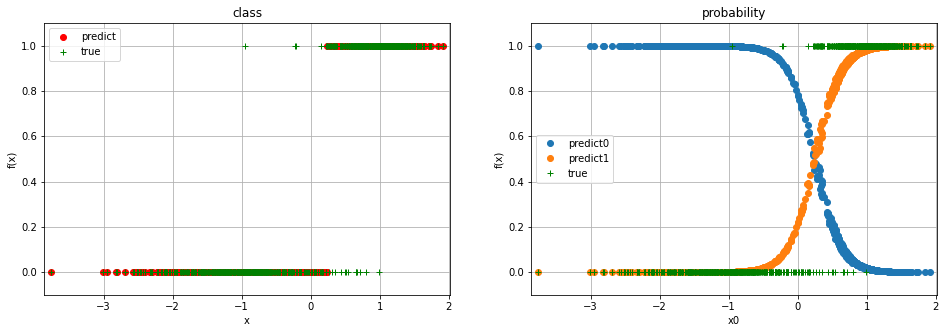

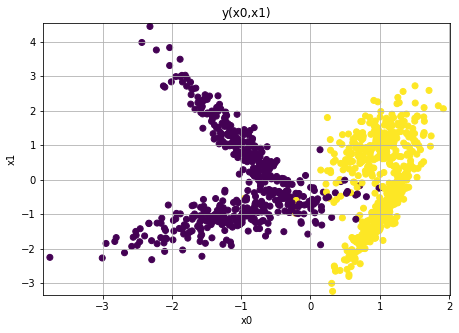

accuracy:  0.981


In [13]:


n = 0 # номер признака для визуализации. проверить результат для n = 1
plt.figure(figsize = (16,5))

ymin = y_test_tr.min()-0.1
ymax = y_test_tr.max()+0.1
xmin = X_test_tr[:,n].min()-0.1
xmax = X_test_tr[:,n].max()+0.1

plt.subplot(1,2,1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.plot(X_test_tr[:,n], y_pred,'or', label = 'predict')
plt.plot(X_test_tr[:,n], y_test_tr, '+g', label = 'true')
plt.grid()
plt.legend()
plt.title('class')

plt.subplot(1,2,2)

plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.title('probability')

for m in range(y_pred_proba.shape[1]):
  if m>1:
    mk = m
  else : mk = 1
  plt.plot(X_test_tr[:,n], y_pred_proba[:,m]*mk,'o', label = 'predict'+ str(m) )

plt.plot(X_test_tr[:,n], y_test_tr, '+g', label = 'true')
plt.grid()
plt.legend()
plt.xlabel('x0')
plt.ylabel('f(x)')



plt.show()


plt.figure(figsize = (7.3,5))
n2 = 1
xmin0 = X_test_tr[:,n2].min()-0.1
xmax0 = X_test_tr[:,n2].max()+0.1

plt.xlabel('x0')
plt.ylabel('x1')
plt.ylim(xmin0,xmax0)
plt.xlim(xmin,xmax)
plt.scatter(X_test_tr[:,n],X_test_tr[:,n2], c = y_test_tr)
plt.title('y(x0,x1)')

plt.grid()

plt.show()


print('accuracy: ',accuracy_score(y_test_tr,y_pred))

На графиках видно, что классификация проходит не очень надежно по признаку х1 и очень хорошо по признаку х0 (практически разделяющий по значению х0 == 0, все для х0<0 соответствует метке 0, все для х0>0 м= метка 1)





  - сформируем отчет о классификации 

In [14]:
print(classification_report(y_test_tr, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       488
           1       0.97      0.99      0.98       512

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



  - проведем эксперимент для нескольких перезапусков алгоритма (К) и различных сочетаний значений гиперпараметров (tol, max_iter). Сделаем сеточный поиск в пространстве вариантов для множества К = 10 реализаций 

In [15]:
import seaborn as sns

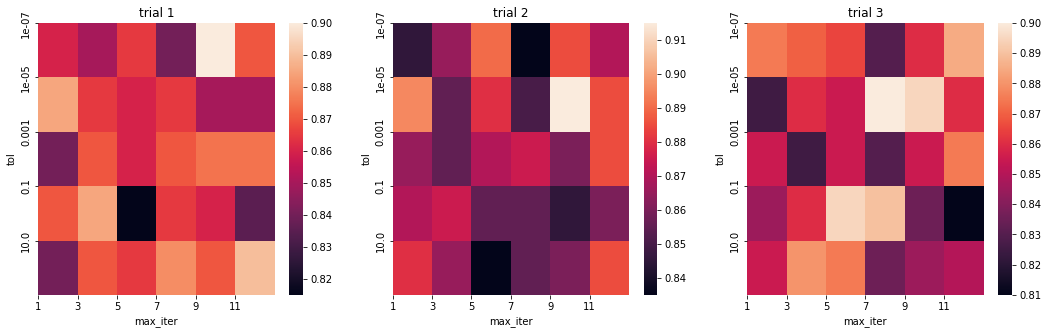

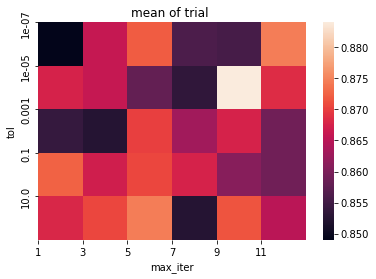

In [36]:
# Эксперимент
rez = []
K = 10
for tol in np.logspace(-7,1,5):
  for max_iter in range(1,12,2):
    acc = []
    for k in range(K):
      logistic_regressor = LogisticRegression( tol = tol, max_iter=max_iter, solver = 'saga')
      # обучим ее
      X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(classes[0], classes[1], test_size=0.2)
      logistic_regressor.fit(X_train_tr, y_train_tr)
      y_pred = logistic_regressor.predict(X_test_tr) 
      acc += [accuracy_score(y_test_tr,y_pred)]
    rez += [[tol,max_iter]+ acc]

rez = np.array(rez)

# Визуализация результата в форме тепловой диаграммы для отдельных реализаций
plt.figure(figsize = (18,5))
for i in [1,2,3]:
  plt.subplot(1,3,i)
  acc_all = rez[:,-i].reshape(5,6)
  sns.heatmap(acc_all)
  plt.title('trial '+str(i))
  plt.xlabel('max_iter')
  plt.xticks(list(range(6)),[str(x) for x in range(1,12,2)])
  plt.ylabel('tol')
  plt.yticks(list(range(5)),[str(x) for x in np.logspace(-7,1,5)])
plt.show()

# Визуализация результата в форме тепловой диаграммы для среднего по всем реализациям (можно еще и разбросс смотреть)

acc_mean = rez[:,-K:].mean(axis=1).reshape(5,6)
sns.heatmap(acc_mean)
plt.title('mean of trial ')
plt.xlabel('max_iter')
plt.xticks(list(range(6)),[str(x) for x in range(1,12,2)])
plt.ylabel('tol')
plt.yticks(list(range(5)),[str(x) for x in np.logspace(-7,1,5)])
plt.show()


  - вывод: необходимо более 5 итераций и менее 0.1 tol. Выборка примеров сбалансирована, и применение метрик типа accuracy обосновано

### **Задание 3.**

Построить последовательность обработки примеров для набора "Ирисы Фишера"(load_iris):
 - провести генерацию классификатора
 - провести анализ результата (см. пример)

In [17]:
data = load_iris()
X, y = data.data, data.target
y[y == 2] = 1
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X, y, test_size=0.2, random_state=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


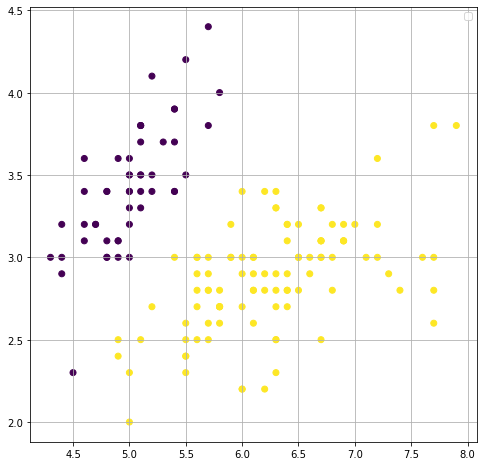

In [18]:
# colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y)
plt.grid()
plt.legend()
plt.show()

In [19]:
# создание модели
y_pred = LogisticRegression(penalty='l2', tol = 0.001, max_iter=10, multi_class='auto', solver='saga',random_state=0).fit(X_train_tr, y_train_tr)
# обучение ее
y_pred = y_pred.fit(X_train_tr, y_train_tr) 
# вероятностная оценка класса
y_pred_proba = y_pred.predict_proba(X_test_tr)
# жесткий ответ (метка класса)
y_pred = y_pred.predict(X_test_tr)

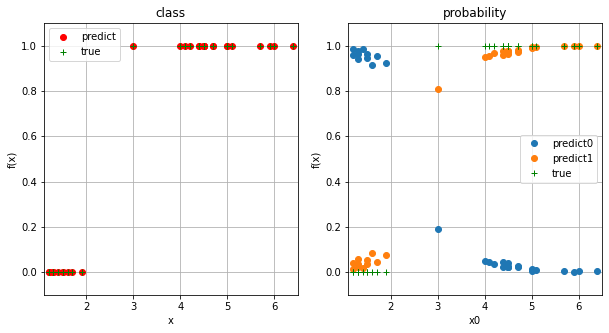

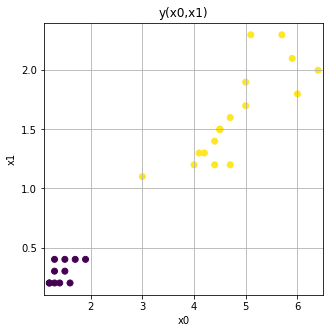

In [20]:
n = 2 # номер признака для визуализации. 
plt.figure(figsize = (10,5))

ymin = y_test_tr.min()-0.1
ymax = y_test_tr.max()+0.1
xmin = X_test_tr[:,n].min()-0.1
xmax = X_test_tr[:,n].max()+0.1

plt.subplot(1,2,1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.plot(X_test_tr[:,n], y_pred,'or', label = 'predict')
plt.plot(X_test_tr[:,n], y_test_tr, '+g', label = 'true')
plt.grid()
plt.legend()
plt.title('class')

plt.subplot(1,2,2)

plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.title('probability')

for m in range(y_pred_proba.shape[1]):
  if m>1:
    mk = m
  else : mk = 1
  plt.plot(X_test_tr[:,n], y_pred_proba[:,m]*mk,'o', label = 'predict'+ str(m) )

plt.plot(X_test_tr[:,n], y_test_tr, '+g', label = 'true')
plt.grid()
plt.legend()
plt.xlabel('x0')
plt.ylabel('f(x)')

plt.show()


plt.figure(figsize = (5,5))
n2 = 3
xmin0 = X_test_tr[:,n2].min()-0.1
xmax0 = X_test_tr[:,n2].max()+0.1

plt.xlabel('x0')
plt.ylabel('x1')
plt.ylim(xmin0,xmax0)
plt.xlim(xmin,xmax)
plt.scatter(X_test_tr[:,n],X_test_tr[:,n2], c = y_test_tr)
plt.title('y(x0,x1)')

plt.grid()
plt.show()

In [21]:
print(classification_report(y_test_tr, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **Задание 4.**

Самостоятельно оценить данные по варианту:

In [22]:

V1 = datasets.load_wine()
V2 = datasets.load_digits()
V3 = datasets.load_breast_cancer()
V4 = datasets.make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = datasets.make_blobs(n_samples=1000, centers=2, n_features=5, random_state=10)

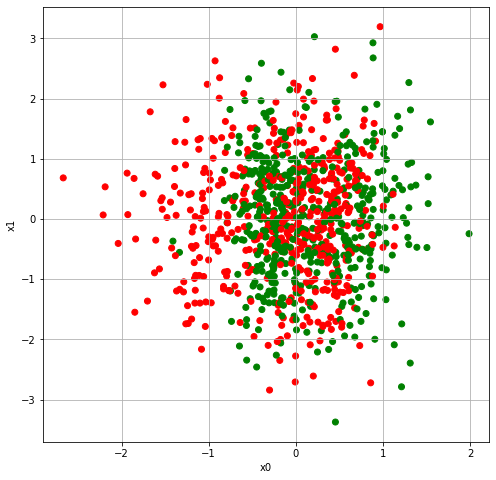

In [23]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)


# и изобразим их на графике
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
# создадим модель
logistic_regressor = LogisticRegression(penalty='l2', tol = 0.001, max_iter=10, multi_class='auto', solver='saga' )

# разбиение данных на тренировочные и отложенную выборку (тестовые), 
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.2 - пропорция разбиения (доля тестов)
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(classes[0], classes[1], test_size=0.2, random_state=1)

# обучим ее
logistic_regressor.fit(X_train_tr, y_train_tr)

# выведем полученный вес при признаке и свободный коэффициент
print(logistic_regressor.coef_[0], logistic_regressor.intercept_)

[ 0.40179689 -0.08987855 -0.14475955  0.49934103  0.02945824 -0.05697222
  1.80273199 -0.22420398 -0.091538    0.03408988] [-0.06876097]


In [25]:
y_pred = logistic_regressor.predict(X_test_tr)  # жесткий ответ (метка класса)
y_pred_proba = logistic_regressor.predict_proba(X_test_tr) # вероятностная оценка класса

In [26]:
print(accuracy_score(y_test_tr, y_pred))

0.9


In [27]:
#Приведем все признаки к одному диапозону (0,1)
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler()
scaler = MinMaxScaler()
print(scaler.fit(X_train_tr))
MinMaxScaler()
print(scaler.data_max_)

# X_scaled = X_test_tr* (max - min) + min
X_scale = ()

MinMaxScaler()
[1.98788967 3.1933711  3.60916071 1.79288483 2.70848797 3.56121935
 3.8830222  4.45636295 2.62510597 3.14228487]


In [28]:
X_scale_train = scaler.transform(X_train_tr)
X_scale_train

array([[0.45728532, 0.6679996 , 0.8958405 , ..., 0.75810098, 0.58878706,
        0.        ],
       [0.43073559, 0.48725048, 0.23761735, ..., 0.62592726, 0.74587254,
        0.18588245],
       [0.60782694, 0.2528621 , 0.66153558, ..., 0.38959159, 0.62493968,
        0.3762095 ],
       ...,
       [0.52949604, 0.55316175, 0.5049934 , ..., 0.54342244, 0.52679979,
        0.44952807],
       [0.51980734, 0.53494375, 0.34555085, ..., 0.58241119, 0.68648711,
        0.55853032],
       [0.5485961 , 0.45304231, 0.38182517, ..., 0.51490841, 0.31687583,
        0.85889752]])

In [29]:
X_scale_test = scaler.transform(X_test_tr)
# X_scale_test

In [30]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
params = {
  'penalty': ['l1', 'l2'],
  'tol': [0.0001, 0.001, 0.01, 0.1],
  'max_iter': [1,2,5,10, 20,50,100,500]
}

results = []
for i in range(len(params['penalty'])):
  for j in range(len(params['tol'])):
    for k in range(len(params['max_iter'])):
      logistic_regressor_tr = LogisticRegression(penalty=params['penalty'][i], tol=params['tol'][j], max_iter=params['max_iter'][k], multi_class='auto', solver='saga',random_state=0)
      logistic_regressor_tr.fit(X_scale_train, y_train_tr)

      y_pred_proba_test = logistic_regressor_tr.predict_proba(X_scale_test)
      y_pred_test = logistic_regressor_tr.predict(X_scale_test)

      accuracy = accuracy_score(y_test_tr,y_pred_test)
      recall = recall_score(y_test_tr, y_pred_test, average='macro')
      precision = precision_score(y_test_tr, y_pred_test, average='macro')
      roc_auc = roc_auc_score(y_test_tr, y_pred_test, multi_class='ovr')
      results.append({'penalty': params['penalty'][i], 
      'tol': params['tol'][j], 
      'max_iter': params['max_iter'][k],
      'accuracy': accuracy,
      'recall': recall, 'precision': precision, 
      'roc_auc': roc_auc})

results_df = pd.DataFrame(results)
print(results_df)


   penalty     tol  max_iter  accuracy    recall  precision   roc_auc
0       l1  0.0001         1     0.865  0.869192   0.865537  0.869192
1       l1  0.0001         2     0.860  0.846465   0.887834  0.846465
2       l1  0.0001         5     0.895  0.897475   0.893854  0.897475
3       l1  0.0001        10     0.900  0.902020   0.898638  0.902020
4       l1  0.0001        20     0.900  0.902020   0.898638  0.902020
..     ...     ...       ...       ...       ...        ...       ...
59      l2  0.1000        10     0.885  0.874242   0.904520  0.874242
60      l2  0.1000        20     0.885  0.874242   0.904520  0.874242
61      l2  0.1000        50     0.885  0.874242   0.904520  0.874242
62      l2  0.1000       100     0.885  0.874242   0.904520  0.874242
63      l2  0.1000       500     0.885  0.874242   0.904520  0.874242

[64 rows x 7 columns]


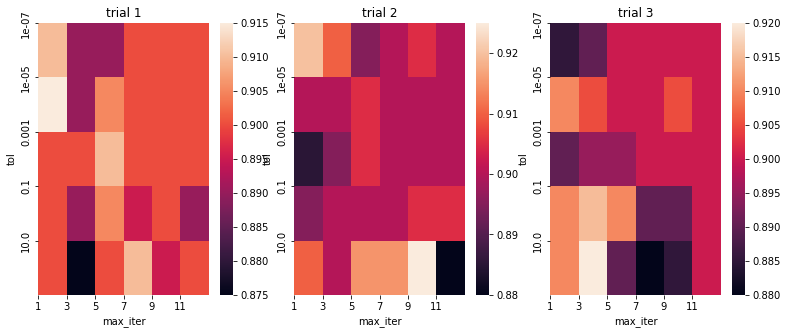

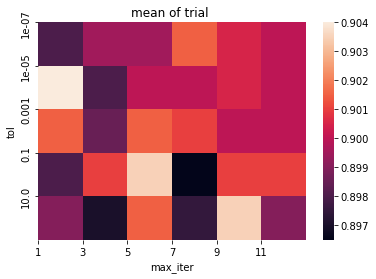

In [31]:
rez = []
K = 10
for tol in np.logspace(-7,1,5):
  for max_iter in range(1,12,2):
    acc = []
    for k in range(K):
      logistic_regressor = LogisticRegression( tol = tol, max_iter=max_iter, solver = 'saga')
      # обучим ее
      logistic_regressor.fit(X_train_tr, y_train_tr)
      y_pred = logistic_regressor.predict(X_test_tr) 
      acc += [accuracy_score(y_test_tr,y_pred)]
    rez += [[tol,max_iter]+ acc]

rez = np.array(rez)

# Визуализация результата в форме тепловой диаграммы для отдельных реализаций
plt.figure(figsize = (13,5))
for i in [1,2,3]:
  plt.subplot(1,3,i)
  acc_all = rez[:,-i].reshape(5,6)
  sns.heatmap(acc_all)
  plt.title('trial '+str(i))
  plt.xlabel('max_iter')
  plt.xticks(list(range(6)),[str(x) for x in range(1,12,2)])
  plt.ylabel('tol')
  plt.yticks(list(range(5)),[str(x) for x in np.logspace(-7,1,5)])
plt.show()

# Визуализация результата в форме тепловой диаграммы для среднего по всем реализациям (можно еще и разбросс смотреть)

acc_mean = rez[:,-K:].mean(axis=1).reshape(5,6)
sns.heatmap(acc_mean)
plt.title('mean of trial ')
plt.xlabel('max_iter')
plt.xticks(list(range(6)),[str(x) for x in range(1,12,2)])
plt.ylabel('tol')
plt.yticks(list(range(5)),[str(x) for x in np.logspace(-7,1,5)])
plt.show()

 4.1.Загрузить данные  по варианту 

 4.2.Построить линейный классификатор в формате sklearn (LogisticRegression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) и в коде из Задания 1.
 
 4.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке
 
 4.4. сделать выводы о качестве для модели из задания 1 и sklearn на основе выбранной метрики

 4.5. Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке
 
 4.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : penalty  {'l2', 'l1'}, tol = [0.0001, 0.001, 0.01, 0.1], max_iter=[1,2,5,10, 20,50,100,500]. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc,  ROC_auc в таблице результатов.
 
 4.7 Повторить кадый эксперимент 5-10 раз для всех вариантов значений и построить зависимость метрики от каждого из гиперпараметров отдельно (или парами в виде тепловой диаграммы)

 4.8 Сделать выводы о качестве модели

Резюме Логистической регрессии:

  - Делает численные оценки вероятности его принадлежности каждому из классов.

  - Является частным случаем обобщённой линейной модели регрессии

  - Оценки вероятностей и рисков могут оказаться неадекватными, если не признаки зависимы
  - Практичная реализация должна предусматривать :
      - стандартизацию данных, 
      - отсев выбросов, 
      - регуляризацию,
      - отбор признаков.

Вопросы для контроля:

  1. Метод стохастического градиента. Расписать градиентный шаг для квадратичной функции потерь и для линейной регрессии.
  2. Недостатки метода SG и как с ними бороться?
  3. Обоснование логистической регрессии и ее идея.
  4. Как выражается функция потерь в логистической регрессии .
  5. Что такое ROC-кривая, как она определяется?
  6. В каких алгоритмах классификации можно узнать не только классовую принадлежность классифицируемого объекта, но и вероятность того, что данный объект принадлежит каждому из классов?
  7. Что такое принцип максимума совместного правдоподобия данных и модели?